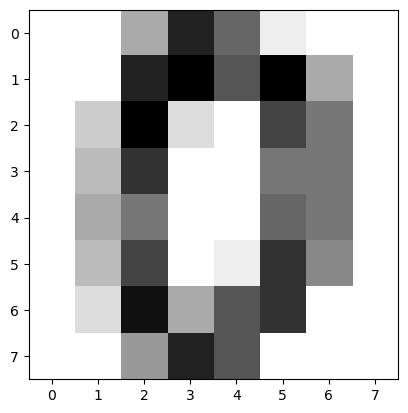

In [183]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [184]:
digits.values

<function Bunch.values>

In [185]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<h3>#이미지 평면화</h3>

In [186]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

<h3>#데이터 나누기</h3>

In [187]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [188]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


<h3>#svm, rf, dt 분류에 confusion matrix 추가</h3>

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [190]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9611111111111111
[[30  0  0  0  0  1  0  0  0  0]
 [ 0 30  0  0  1  0  0  0  3  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  1 46  0  0  0  0  0  1]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  1  1 38  0  0  0  0]
 [ 0  0  0  0  0  1 31  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  2  0  0  1  0  0 34  1]
 [ 0  0  0  0  0  0  0  0  0 28]]


In [191]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)


In [192]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [193]:
# 테스트 데이터로 예측해본다.

y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9972222222222222


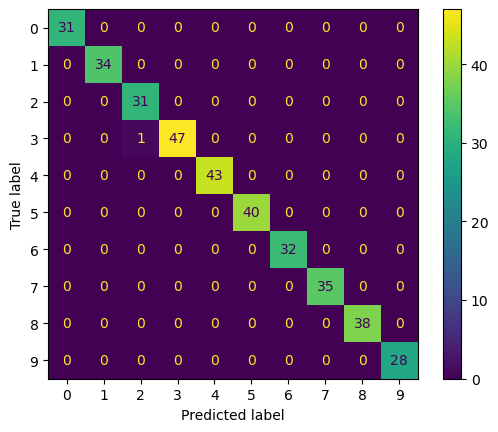

In [194]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [195]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))


--- SVM Classifier ---
1.0


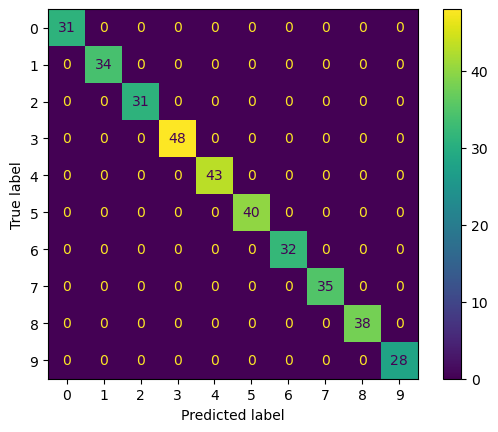

In [196]:
disp = metrics.plot_confusion_matrix(clf_svm, X_test, y_test)
plt.show()

In [197]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8388888888888889
[[30  0  0  0  0  0  1  0  0  0]
 [ 0 29  0  2  1  0  0  0  1  1]
 [ 0  1 27  1  0  1  0  1  0  0]
 [ 0  2  3 34  0  1  0  2  2  4]
 [ 0  1  0  1 35  0  2  2  0  2]
 [ 0  0  0  1  1 36  0  0  1  1]
 [ 0  1  0  0  4  0 27  0  0  0]
 [ 0  0  0  1  0  0  0 31  0  3]
 [ 0  3  3  1  0  0  0  1 30  0]
 [ 0  0  1  3  0  0  0  1  0 23]]


In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9694444444444444
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  0  0  1  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  1  1  0]
 [ 0  0  0  0 42  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  1 31  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  1  0  0  1  0  0  1 35  0]
 [ 0  0  0  1  0  0  0  0  0 27]]


<h3>#DL 수행</h3>

In [199]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [200]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y_train)
y2 = encoder.fit_transform(y_test)
y_train = pd.get_dummies(y1).values
y_test = pd.get_dummies(y2).values

In [201]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(70,input_shape=(64,),activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(10,activation='softmax'))##분류는 분류하고자하는 개수, 회귀는 1

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])##다중 분류 categorical_crossentropy, 두개 분류는 binary_crossentropy, 회귀는 mse

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 70)                4550      
                                                                 
 dense_60 (Dense)            (None, 75)                5325      
                                                                 
 dense_61 (Dense)            (None, 80)                6080      
                                                                 
 dense_62 (Dense)            (None, 10)                810       
                                                                 
Total params: 16,765
Trainable params: 16,765
Non-trainable params: 0
_________________________________________________________________


In [202]:
#fitting the model and predicting 
import numpy as np
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=45, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/45
45/45 [==============================] - 1s 6ms/step - loss: 0.4393 - accuracy: 0.3667 - val_loss: 0.1941 - val_accuracy: 0.5472
Epoch 2/45
45/45 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.7105 - val_loss: 0.0942 - val_accuracy: 0.8417
Epoch 3/45
45/45 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.8490 - val_loss: 0.0902 - val_accuracy: 0.8500
Epoch 4/45
45/45 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.8803 - val_loss: 0.0916 - val_accuracy: 0.8444
Epoch 5/45
45/45 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.8907 - val_loss: 0.1210 - val_accuracy: 0.8028
Epoch 6/45
45/45 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.8928 - val_loss: 0.0845 - val_accuracy: 0.8806
Epoch 7/45
45/45 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9165 - val_loss: 0.0524 - val_accuracy: 0.9111
Epoch 8/45
45/45 [==

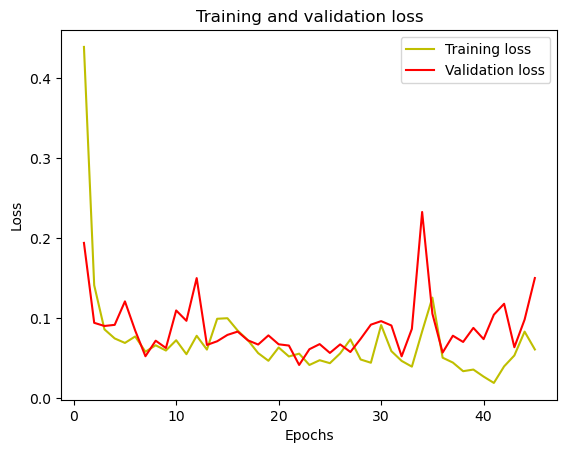

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

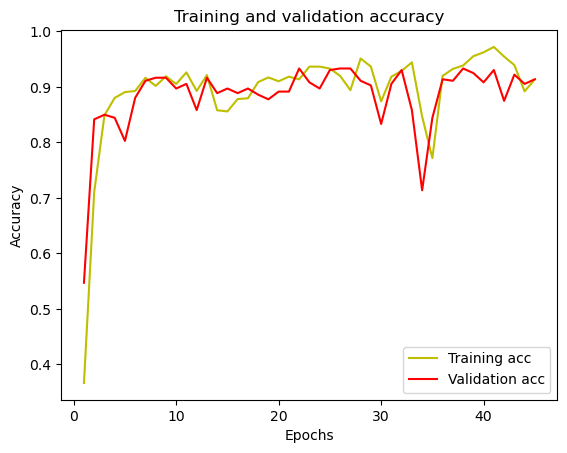

In [204]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [205]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.97      0.93        34
           2       0.91      1.00      0.95        31
           3       0.95      0.85      0.90        48
           4       1.00      0.79      0.88        43
           5       0.97      0.93      0.95        40
           6       0.97      0.94      0.95        32
           7       0.85      1.00      0.92        35
           8       0.71      0.79      0.75        38
           9       0.93      0.96      0.95        28

    accuracy                           0.91       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.91      0.91       360

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  1 41  0  0  0  1  5  0]
 [ 0  2  0  0 34  0  0  4  3  0]
 [ 0  1  0  0  0 37  0  1  1  0]
 [ 0  0  0  0  0  0 30  0  2  0]
 [ 0  0  0